## Data Science Intern at ResoluteAI
Task-2 : Prediction using Unsupervised ML
## Aurthor : Yati Maheshwari
### Importing the relevant libraries

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()
from sklearn .cluster import KMeans 
from sklearn.preprocessing import StandardScaler

## Loading the Data

In [2]:
data = pd.read_excel('Online_Retail.xlsx')
df = data.copy()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df.shape

(541909, 8)

## Data Cleaning
### Check Duplicates

In [4]:
df.duplicated().sum()

5268

In [5]:
duplicate_df = df[df.duplicated()]
duplicate_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


### Conclusion
We have 5268 duplicate rows.

In [6]:
duplicate_df.nunique()

InvoiceNo      1933
StockCode      1706
Description    1732
Quantity         35
InvoiceDate    1914
UnitPrice        80
CustomerID      960
Country          14
dtype: int64

In [7]:
# Drop Duplicates
df = df.drop_duplicates()


### Dealing with missing values

In [8]:
#Checking null data
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

So We have 135037 Null rows of CustomerID and Description.

In [107]:
# Drop Null values.
df = df.dropna()
df.shape

(401604, 10)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


In [11]:
df['CustomerID'] = df['CustomerID'].astype(str)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  object        
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.6+ MB


## Feature Engineering

In [13]:
df["total_Price"]=df.UnitPrice * df.Quantity
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [14]:
new_df = pd.DataFrame()

In [15]:
df["total_Price"]=df.UnitPrice * df.Quantity
new_df['Amount'] = df.groupby("CustomerID")["total_Price"].sum()
new_df["Frequency"]=df.groupby("CustomerID")["InvoiceNo"].count()


In [16]:
new_df.reset_index(inplace=True)
new_df

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17
...,...,...,...
4367,18280.0,180.60,10
4368,18281.0,80.82,7
4369,18282.0,176.60,13
4370,18283.0,2045.53,721


we analyse the data on the basis Amount, frequency and Recency.<br>
Amount : Total Revenue Transactions by Customer<br>
Frequency : Number of Transaction by Customer

In [17]:
df["InvoiceDate"]=pd.to_datetime(df["InvoiceDate"],format="%d-%m-%Y %H:%M")
max_date = max(df['InvoiceDate'])



In [18]:
df['Diff_in_date'] = max_date - df['InvoiceDate']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_Price,Diff_in_date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [111]:
df_1 = df.groupby("CustomerID")["Diff_in_date"].min().reset_index()
df_1 = df_1.rename(columns={"Diff_in_date" : "Recency"})
df_1

,CustomerID,Recency
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00
...,...,...
4367,18280.0,277 days 02:58:00
4368,18281.0,180 days 01:57:00
4369,18282.0,7 days 01:07:00
4370,18283.0,3 days 00:48:00


Recency : Number of days science last Purchase

In [112]:
final_df = pd.merge(df_1, new_df, on='CustomerID', how='inner')
final_df

,CustomerID,Recency,Amount,Frequency
0,12346.0,325 days 02:33:00,0.00,2
1,12347.0,1 days 20:58:00,4310.00,182
2,12348.0,74 days 23:37:00,1797.24,31
3,12349.0,18 days 02:59:00,1757.55,73
4,12350.0,309 days 20:49:00,334.40,17
...,...,...,...,...
4367,18280.0,277 days 02:58:00,180.60,10
4368,18281.0,180 days 01:57:00,80.82,7
4369,18282.0,7 days 01:07:00,176.60,13
4370,18283.0,3 days 00:48:00,2045.53,721


In [113]:
final_df['Recency'] = final_df['Recency'].dt.days
final_df

,CustomerID,Recency,Amount,Frequency
0,12346.0,325,0.00,2
1,12347.0,1,4310.00,182
2,12348.0,74,1797.24,31
3,12349.0,18,1757.55,73
4,12350.0,309,334.40,17
...,...,...,...,...
4367,18280.0,277,180.60,10
4368,18281.0,180,80.82,7
4369,18282.0,7,176.60,13
4370,18283.0,3,2045.53,721


In [114]:
df_a = df[['Country','CustomerID']].copy()
df_a

,Country,CustomerID
0,United Kingdom,17850.0
1,United Kingdom,17850.0
2,United Kingdom,17850.0
3,United Kingdom,17850.0
4,United Kingdom,17850.0
...,...,...
541904,France,12680.0
541905,France,12680.0
541906,France,12680.0
541907,France,12680.0


In [124]:
df_a =df_a.drop_duplicates()
df_a.shape

(4380, 2)

In [115]:
df_C = final_df.copy()

In [125]:
df_3 = pd.merge(df_a, df_C, on='CustomerID', how='inner')
df_3

,Country,CustomerID,Recency,Amount,Frequency
0,United Kingdom,17850.0,301,5303.48,309
1,United Kingdom,13047.0,31,3079.10,196
2,France,12583.0,2,7187.34,251
3,United Kingdom,13748.0,95,948.25,28
4,United Kingdom,15100.0,329,635.10,6
...,...,...,...,...,...
4375,United Kingdom,13436.0,1,196.89,12
4376,United Kingdom,15520.0,1,343.50,18
4377,United Kingdom,13298.0,0,360.00,2
4378,United Kingdom,14569.0,0,227.39,12


In [126]:
df_2 = df_3.drop_duplicates()
df_2

,Country,CustomerID,Recency,Amount,Frequency
0,United Kingdom,17850.0,301,5303.48,309
1,United Kingdom,13047.0,31,3079.10,196
2,France,12583.0,2,7187.34,251
3,United Kingdom,13748.0,95,948.25,28
4,United Kingdom,15100.0,329,635.10,6
...,...,...,...,...,...
4375,United Kingdom,13436.0,1,196.89,12
4376,United Kingdom,15520.0,1,343.50,18
4377,United Kingdom,13298.0,0,360.00,2
4378,United Kingdom,14569.0,0,227.39,12


In [127]:
df_2.reset_index(inplace=True)

In [128]:
df_2 = df_2.iloc[:,1:]
df_2

,Country,CustomerID,Recency,Amount,Frequency
0,United Kingdom,17850.0,301,5303.48,309
1,United Kingdom,13047.0,31,3079.10,196
2,France,12583.0,2,7187.34,251
3,United Kingdom,13748.0,95,948.25,28
4,United Kingdom,15100.0,329,635.10,6
...,...,...,...,...,...
4375,United Kingdom,13436.0,1,196.89,12
4376,United Kingdom,15520.0,1,343.50,18
4377,United Kingdom,13298.0,0,360.00,2
4378,United Kingdom,14569.0,0,227.39,12


In [129]:
df_f=df_2.iloc[:,2:]
df_f

,Recency,Amount,Frequency
0,301,5303.48,309
1,31,3079.10,196
2,2,7187.34,251
3,95,948.25,28
4,329,635.10,6
...,...,...,...
4375,1,196.89,12
4376,1,343.50,18
4377,0,360.00,2
4378,0,227.39,12


## Detecting Outliers

<Axes: >

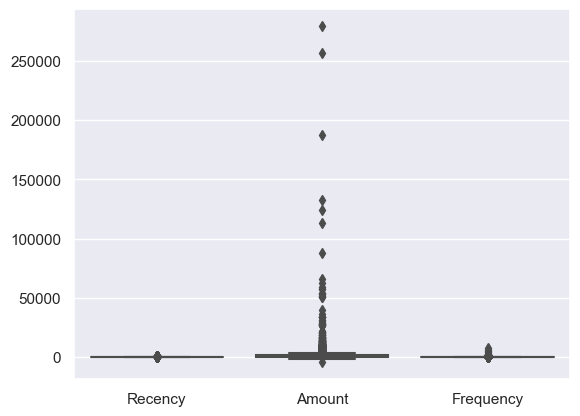

In [67]:
sns.boxplot(data=df_f)

### Removing Outlires using Z-score

In [88]:
import scipy.stats as stats
#find absolute value of z-score for each observation
z = np.abs(stats.zscore(df_f))

#only keep rows in dataframe with all z-scores less than absolute value of 1
df_f = df_f[(z<1).all(axis=1)]

#find how many rows are left in the dataframe 
df_f.shape

(3343, 3)

<Axes: >

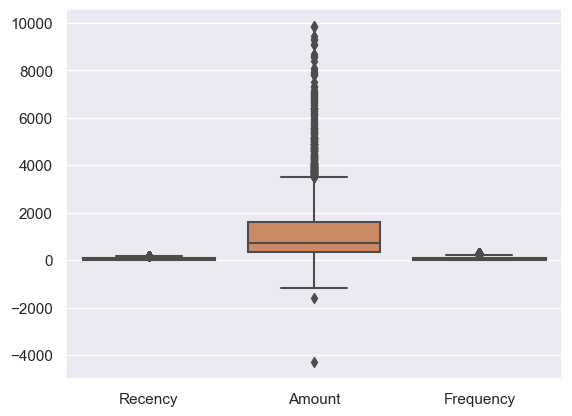

In [89]:
sns.boxplot(data=df_f)

In [90]:
X = df_f.copy()

### Scale or normalize the selected features using StandardScaler

In [91]:
X = StandardScaler().fit_transform(X)
X

array([[-0.43833524,  1.33052424,  1.82338637],
       [-1.01978543,  4.28875235,  2.62683768],
       [ 0.84486516, -0.20384093, -0.6307922 ],
       ...,
       [-1.05988544, -0.62742322, -1.01060555],
       [-1.05988544, -0.72291195, -0.86452349],
       [-1.05988544, -0.2756321 , -0.48471014]])

## Model Bulding
### Apply K-Means Clustering

In [93]:
# k-means with some arbitrary k

kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(X)

C:\Users\yatim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=4)

In [94]:
kmeans.labels_

array([3, 0, 1, ..., 2, 2, 2])

## Finding the Optimal Number of Clusters
### WCSS('within-cluster sum of squares')

By minimising the wcss get perfect clustring solution

In [95]:
WCSS = []
for k in range(2,9):
    kmeans = KMeans(n_clusters=k, max_iter=50)
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)
WCSS

C:\Users\yatim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\yatim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\yatim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

[5913.5196234995965,
 3814.086827289574,
 2984.44102457666,
 2569.6568651178472,
 2199.17751062777,
 1980.4722925395909,
 1759.0533437412973]

### The Elbow Method

Text(0, 0.5, 'Within-cluster Sum of Squares')

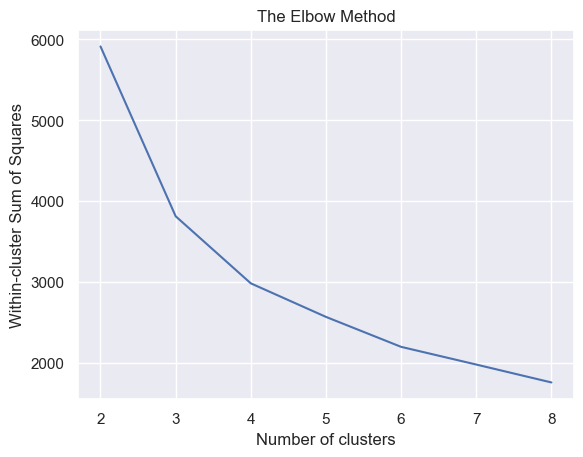

In [96]:
number_clusters = range(2,9)
plt.plot(number_clusters, WCSS)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

In [97]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(X)

C:\Users\yatim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=3)

In [98]:
kmeans.labels_

array([0, 0, 2, ..., 1, 1, 1])

In [99]:
# assign the label
df_f['Cluster_Id'] = kmeans.labels_
df_f.head()

C:\Users\yatim\AppData\Local\Temp\ipykernel_18164\1650235687.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['Cluster_Id'] = kmeans.labels_


,Recency,Amount,Frequency,Cluster_Id
1,31,3079.10,196,0
2,2,7187.34,251,0
3,95,948.25,28,2
5,25,4596.51,109,0
7,15,4627.62,64,0


In [130]:
df_f.shape

(4380, 3)

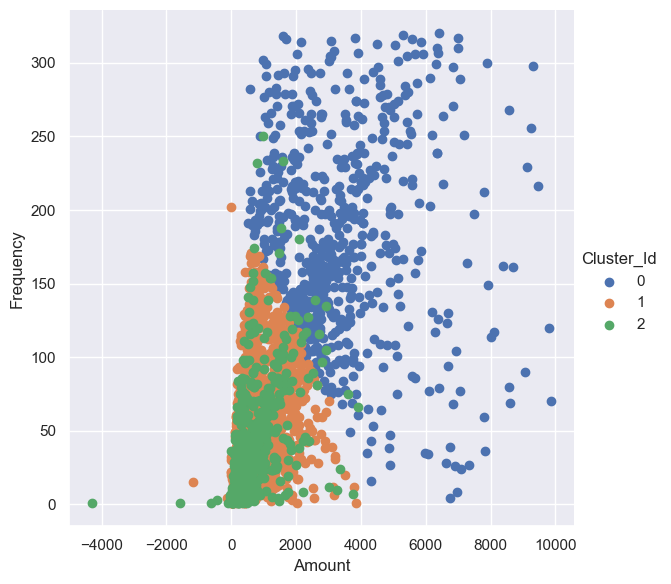

In [101]:
# create a scatter plot 
scs = sns.FacetGrid(df_f, hue="Cluster_Id",height=6) 
scs.map(plt.scatter,'Amount','Frequency') 
scs.add_legend()
plt.show()

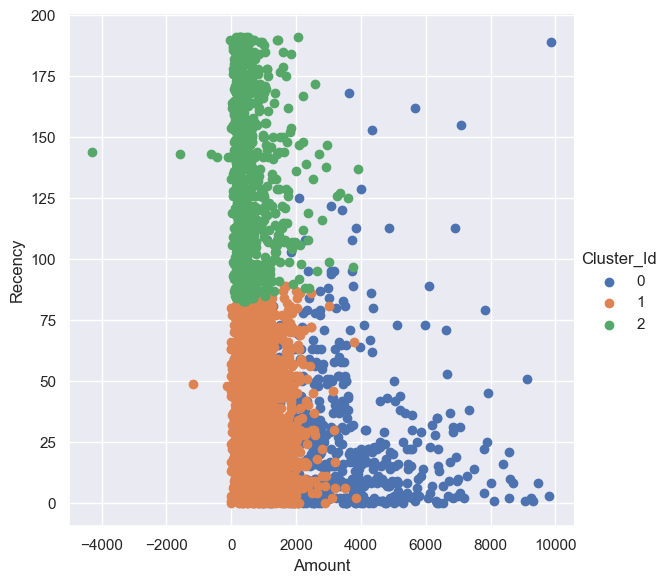

In [105]:
# create a scatter plot 
scs = sns.FacetGrid(df_f, hue="Cluster_Id",height=6) 
scs.map(plt.scatter,'Amount','Recency') 
scs.add_legend()
plt.show()

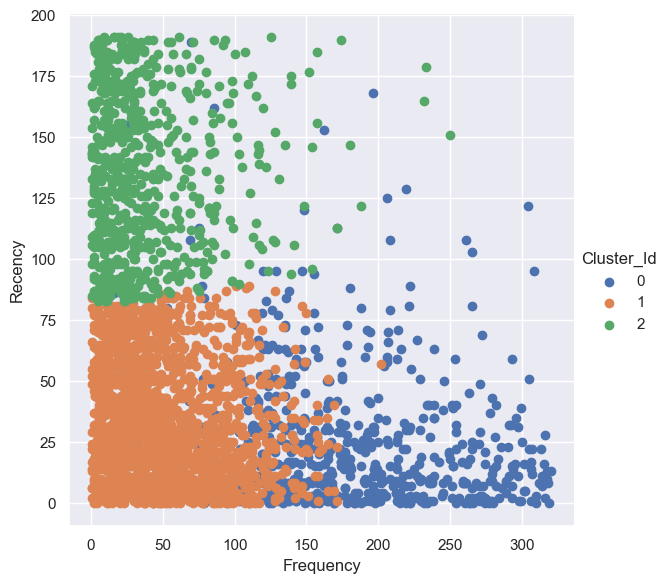

In [106]:
# create a scatter plot 
scs = sns.FacetGrid(df_f, hue="Cluster_Id",height=6) 
scs.map(plt.scatter,'Frequency','Recency') 
scs.add_legend()
plt.show()

<Axes: xlabel='Cluster_Id', ylabel='Amount'>

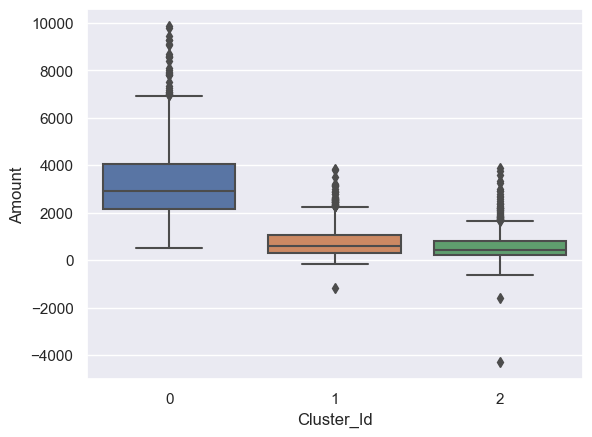

In [102]:
sns.boxplot(x='Cluster_Id', y='Amount', data=df_f)

<Axes: xlabel='Cluster_Id', ylabel='Frequency'>

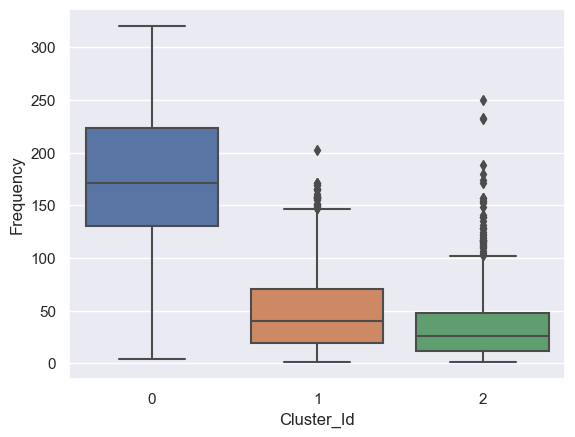

In [103]:
sns.boxplot(x='Cluster_Id', y='Frequency', data=df_f)


<Axes: xlabel='Cluster_Id', ylabel='Recency'>

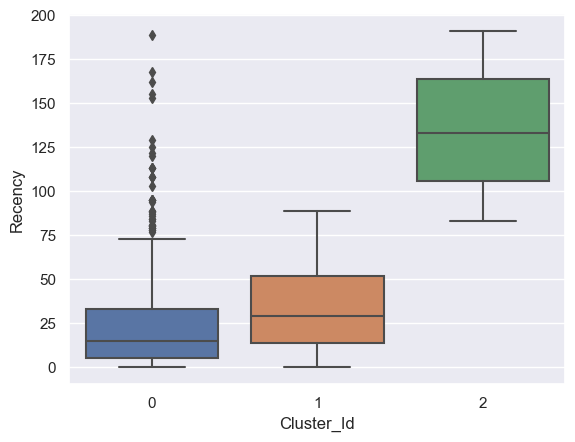

In [104]:
sns.boxplot(x='Cluster_Id', y='Recency', data=df_f)


## Final Conclusion
K-Means Clustering with 3 Cluster Ids
-
    1) Customers with Cluster Id 0 are the customers with high amount of transactions as compared to other customers.
        Business Actions:
            -Personalized Recommendations: Suggest products or services related to their previous high-value purchases.

    2) Customers with Cluster Id 1 are frequent buyers.
        Business Actions:
            -Feedback Gathering: Engage with them to understand their preferences and improve their shopping experience.
        
    3) Customers with Cluster Id 2 are not recent buyers and hence least of importance from business point of view. 
        Business Actions:
            -Re-Engagement Campaigns: Send targeted emails or promotions to re-engage these customers.


### Regularly monitoring the performance of these actions and adjusting them based on the actual results is crucial for a successful customer segmentation strategy. Additionally, We can use more advanced analytics and predictive modeling to further refine your customer targeting and retention strategies.